In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import os
os.chdir('/content/gdrive/MyDrive/2021/졸업프로젝트 code')

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from gensim.models import Word2Vec, FastText

In [4]:
data = pd.read_csv('titles_preprocessed.csv', names = ['views', 'title'], usecols = [5, 6])
data.head()

,views,title
0,30038.0,만 19세 연봉 1억 친구와 레스토랑 브이로그
1,29102.0,bbq 신메뉴 체고치 순살 먹어봄
2,25022.0,구찌 라이톤이랑 시계 후기
3,49551.0,엽기 로제떡볶이랑 허니 콤보 혼내줌
4,74348.0,어림도 없지 바로 마라탕 먹어버림


In [5]:
len(data)

101164

In [6]:
# title
titles = data['title']
titles.head()

0    만 19세 연봉 1억 친구와 레스토랑 브이로그
1           bbq 신메뉴 체고치 순살 먹어봄
2               구찌 라이톤이랑 시계 후기
3          엽기 로제떡볶이랑 허니 콤보 혼내줌
4           어림도 없지 바로 마라탕 먹어버림
Name: title, dtype: object

제목의 최대 길이 : 231
제목의 평균 길이 : 54.892738523585464


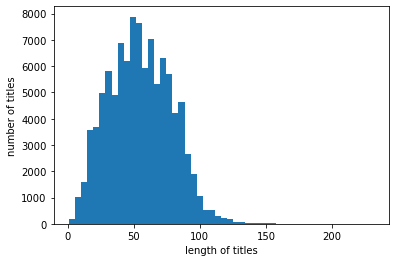

In [7]:
# 제목 길이 분포 
print('제목의 최대 길이 :',max(len(l) for l in titles))
print('제목의 평균 길이 :',sum(map(len, titles))/len(titles))
plt.hist([len(s) for s in titles], bins=50)
plt.xlabel('length of titles')
plt.ylabel('number of titles')
plt.show()

## Load Model

In [8]:
from gensim.models import KeyedVectors
from gensim.models import Word2Vec

# 벡터 임베딩한 모델 불러오기
model = KeyedVectors.load_word2vec_format("pretest_w2v")

In [9]:
# 모델 잘 불러져왔는지 확인
model.most_similar('브이로그', topn = 20)

[('즉흥댄스', 0.3725656569004059),
 ('잡으러', 0.3662964105606079),
 ('선보인', 0.3612181544303894),
 ('는', 0.35454457998275757),
 ('체조요정', 0.3529532551765442),
 ('기우', 0.3480931222438812),
 ('저격', 0.3453805446624756),
 ('기재부', 0.34003037214279175),
 ('100억', 0.34001636505126953),
 ('들을', 0.338901162147522),
 ('수현', 0.33877938985824585),
 ('같은데', 0.3376886248588562),
 ('겨울캠핑', 0.3356877565383911),
 (':heart_suit:이유비', 0.330501526594162),
 ('꽤', 0.32821011543273926),
 ('지키기', 0.3280877470970154),
 ('호랑이', 0.32417553663253784),
 ('집밥', 0.323672354221344),
 ('직강', 0.32362672686576843),
 ('방금', 0.3234623074531555)]

In [24]:
vectors = model.wv.vectors          # 단어 벡터
empty = np.empty_like(vectors[0])   # 단어 벡터의 크기 만큼의 array 생성
empty[:] = np.nan                   # nan으로 초기화
empty                               # empty array 생성 >> 이후 제목 벡터 존재하지 않을 시 사용


array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan], dtype=float32)

## Title Vectorization

In [25]:
# 단어 벡터들의 평균 -> 제목 벡터 

def vectors(title_list):
    title_vec = []      # 제목 벡터들 저장할 list

    for line in title_list:
        tit2vec = None  # 제목벡터
        count = 0       # 단어 수 count
        for word in line.split():       # 제목의 각 단어
            if word in model.wv.vocab:  # 모델의 사전에 존재할 시
                count += 1              # 제목의 단어 수 증가
                
                # 해당 문서에 있는 모든 단어들의 벡터값 더하기
                if tit2vec is None:
                    tit2vec = model[word]   
                else:
                    tit2vec = tit2vec + model[word]

        if tit2vec is not None:
            tit2vec = tit2vec / count   # 제목벡터 >> 단어 벡터의 합을 단어 수로 나누기
            title_vec.append(tit2vec)   # 제목벡터 추가
        else:  # 제목의 모든 단어가 문서에 존재하지 않을 시 >> Nan
            title_vec.append(empty)
    # 각 제목에 대한 제목벡터 리스트를 반환
    return title_vec


단어 벡터 생성시 min_count = 5로 지정했기 때문에 해당 제목에만 있는 단어들로 이루어져 있을 시 제목 벡터 생성이 안 될 수도 있다.

In [26]:
title_vec = vectors(titles)
print('제목 벡터의 수 :',len(title_vec))

제목 벡터의 수 : 101164


In [27]:
# 앞쪽 3개의 제목 벡터 출력
title_vec[:3] 

-04, -3.2932198e-04,  5.9512130e-04, -1.8517813e-03],
       dtype=float32),
 array([ 1.85044110e-03, -4.89520549e-04, -4.74296510e-04,  8.78518913e-04,
         8.77982064e-04,  3.25402943e-04, -8.98174883e-04,  1.42457243e-03,
        -1.43098284e-03,  6.73769100e-04,  2.14792206e-03,  3.80474236e-03,
         1.52953854e-03, -2.14097046e-04,  8.13122198e-04, -7.51501240e-04,
         3.65094724e-03,  1.96125751e-04, -1.00872945e-04,  2.05841221e-04,
         3.48409339e-05, -7.34992558e-04,  3.25117353e-03, -1.65457616e-03,
         3.42224259e-03, -3.05391644e-04, -2.64840410e-03, -9.30543349e-04,
         2.23470759e-03,  2.70955265e-04, -2.12861621e-03, -2.51268269e-03,
         1.23564899e-03,  4.01864905e-04, -1.44277420e-03, -1.69640334e-04,
        -1.62959797e-03,  1.83790049e-03, -2.14675255e-03,  1.74273329e-03,
         1.91359781e-03, -2.19608378e-03, -1.84007920e-03,  2.06923950e-03,
        -7.05897750e-04,  3.43670021e-03, -8.64509493e-04,  8.49645294e-04,
         2.

In [31]:
titvec_df = pd.DataFrame(title_vec) # 제목 벡터 df생성

In [33]:
titvec_df.isna().sum() # 932개의 제목들에 대해 제목 벡터가 생성되지 않음

0     932
1     932
2     932
3     932
4     932
     ... 
95    932
96    932
97    932
98    932
99    932
Length: 100, dtype: int64

In [34]:
titvec_df.insert(loc=0, column='title', value=titles)   # 제목 벡터에 title column 추가

In [36]:
titvec_df.to_csv('pretest_tit2vec.csv')
titvec_df

,title,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,만 19세 연봉 1억 친구와 레스토랑 브이로그,0.000256,-0.000097,0.001557,0.001341,-0.000210,-0.000190,-0.001032,0.001506,-0.000101,...,0.001503,0.000452,-0.001587,0.000547,0.001645,0.001004,0.001163,0.000189,0.000820,0.001340
1,bbq 신메뉴 체고치 순살 먹어봄,-0.000863,0.002012,-0.002427,0.001658,0.002290,-0.001212,-0.000027,0.000117,0.000080,...,0.002260,-0.002857,0.000888,-0.001648,-0.001000,0.000527,0.000811,-0.000329,0.000595,-0.001852
2,구찌 라이톤이랑 시계 후기,0.001850,-0.000490,-0.000474,0.000879,0.000878,0.000325,-0.000898,0.001425,-0.001431,...,0.001861,0.001353,-0.002346,0.002358,-0.002241,0.002913,0.002655,-0.001163,0.000955,0.002372
3,엽기 로제떡볶이랑 허니 콤보 혼내줌,-0.000033,0.000794,0.001980,0.000153,0.000968,0.001949,0.001016,0.002044,-0.001805,...,0.002681,-0.000114,-0.001846,0.000614,-0.001330,0.001833,-0.000647,-0.000026,0.000613,0.001600
4,어림도 없지 바로 마라탕 먹어버림,0.001274,-0.001929,-0.000484,-0.000120,0.000387,0.000172,-0.001413,-0.002598,-0.001201,...,0.000420,0.000028,0.000692,0.000484,0.001661,-0.000975,-0.002726,-0.002886,0.003507,-0.001467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101159,현실남매 먹방하러 갔다가 진짜 싸웠습니다,0.000922,0.000595,-0.000680,0.002079,-0.002520,0.001458,0.001792,0.000939,0.003139,...,-0.000243,-0.000059,0.001135,0.000623,0.000961,-0.000180,0.001221,-0.003465,0.001871,0.001086
101160,직업체험 dj예나 일일 매니저 월디페 world dj festival,0.001650,0.001431,0.001740,-0.000169,-0.000596,0.000603,0.000580,-0.000785,-0.000069,...,0.000585,0.000571,-0.002168,0.000030,0.001103,0.001746,-0.002547,-0.000875,-0.000229,-0.002455
101161,저의 슈퍼모델 친구들을 소개합니다,0.002228,-0.001478,-0.002345,0.002386,-0.000286,0.003877,0.000473,0.000419,-0.001916,...,-0.001231,-0.000459,-0.003178,-0.000479,0.002403,-0.000833,-0.001094,-0.000404,-0.000438,-0.000807
101162,현실남매 우리만 이런건가요 ? 남들이 이해 못하는 현실남매,0.002771,-0.000094,0.002030,0.001919,-0.002382,0.001520,-0.001006,-0.000282,0.002071,...,-0.001115,0.000456,-0.000228,0.000270,-0.000797,-0.001840,0.002459,-0.001244,-0.001092,0.001087
